Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('/content/Telco-Customer-Churn.csv')

Reviewing Features and Target Variables

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Target variable = Churn, Features = rest

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.shape

(7043, 21)

Data Preprocessing

In [8]:
# Total charges data type is object, while it should be float as well
# The column TotalCharges has some blank values where tenure = 0
df['TotalCharges'] = df['TotalCharges'].replace(" ", "0")
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [ ]:
# Verifying
if df['TotalCharges'].dtype == 'float64':
    print("The Total Charges column is of type float.")
elif df['TotalCharges'].dtype == 'object':
    print("The Total Charges column is of type object.")

The Total Charges column is of type float.


In [ ]:
# Senior Citizen data type is integer, while it should be object
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})
df['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
No,5901
Yes,1142


In [9]:
# Checking for null values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [10]:
# Checking for duplicates
df['customerID'].duplicated().sum()

0

In [11]:
df.value_counts('customerID').sum()

7043

Exploratory Analysis

In [12]:
# Statistical Values
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
print(df.describe(include='object'))

        customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     7590-VHVEG   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq

Visualisations

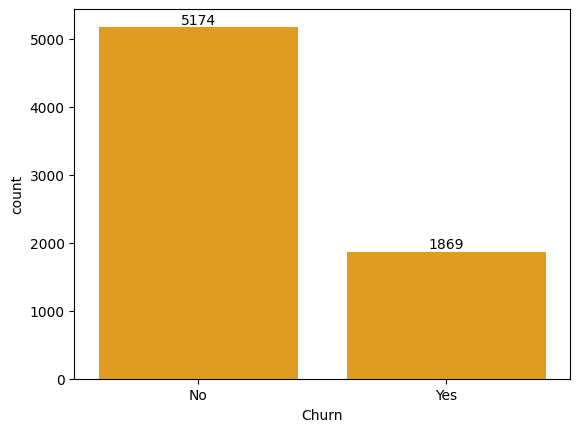

In [14]:
# Countplot for churn
ax = sns.countplot(x='Churn', data=df, color = 'orange')
ax.bar_label(ax.containers[0])
plt.show()

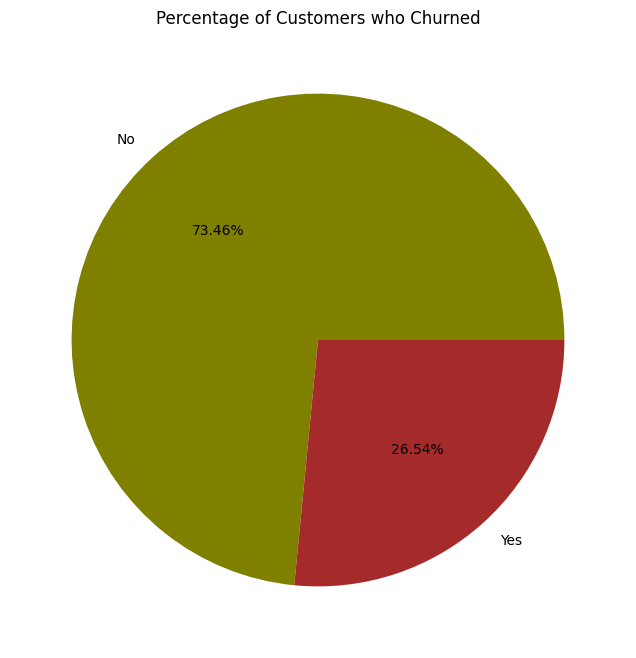

In [15]:
# Pie Plot of Customers who Churned
plt.figure(figsize = (8,8))
gb = df.groupby('Churn').agg({'Churn':'count'})
colors = ['olive', 'brown']
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%", colors=colors)
plt.title('Percentage of Customers who Churned')
plt.show()

In [16]:
# 26.54% Customers churned

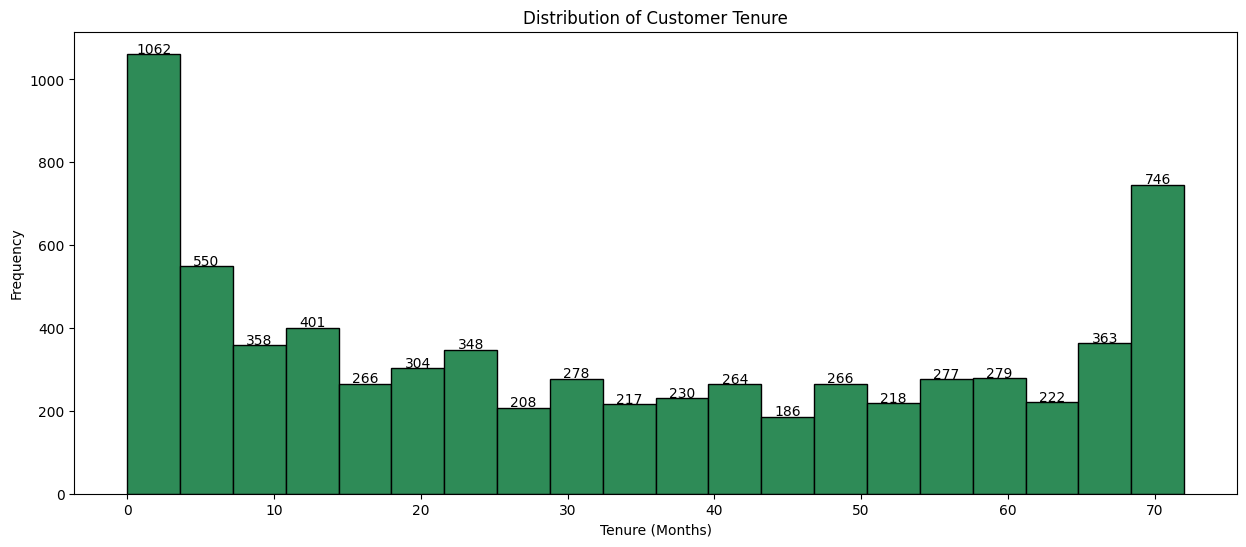

In [17]:
plt.figure(figsize=(15, 6))
bin_counts, bin_edges, _ = plt.hist(df['tenure'], bins=20, edgecolor='black', color='seagreen')
# Adding labels to the bars
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')

# Adding data labels to each bar
for i in range(len(bin_counts)):
    # Center the label over each bar
    plt.text(bin_edges[i] + (bin_edges[i + 1] - bin_edges[i]) / 2,
             bin_counts[i] + 2,
             str(int(bin_counts[i])),
             ha='center')
plt.show()

In [19]:
# Majority people churned at the start of thier contracts

In [18]:
df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


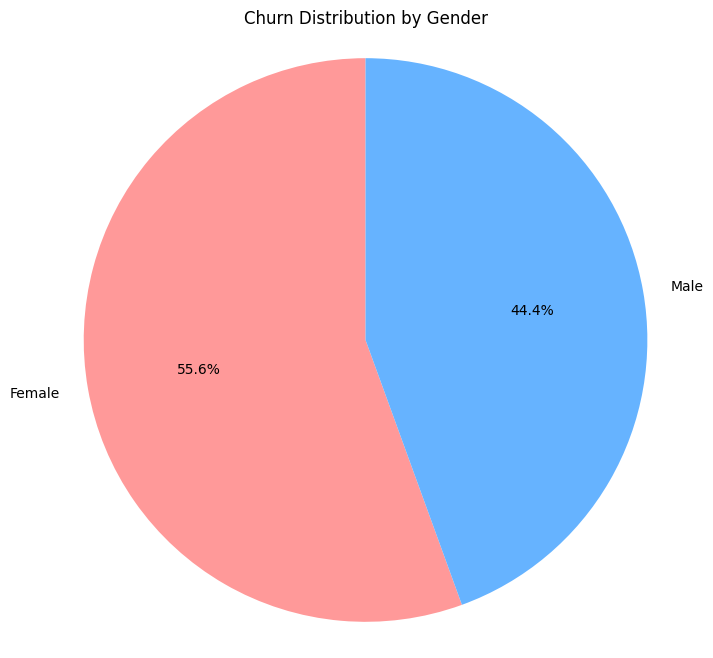

In [20]:
# Sample DataFrame creation
data = {
    'gender': ['Male', 'Female', 'Male', 'Female', 'Female',
               'Male', 'Female', 'Male', 'Female', 'Female',
               'Male', 'Female', 'Male', 'Male', 'Female'],
    'churn': [1, 0, 1, 1, 0,
              1, 0, 0, 1, 1,
              0, 1, 1, 0, 1]
}
df = pd.DataFrame(data)

# Calculating churn counts by gender
churn_counts = df[df['churn'] == 1]['gender'].value_counts()

# Creating pie chart
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Churn Distribution by Gender')
plt.axis('equal')
plt.show()


In [21]:
# Most churn by female 55.6%, 44.4% male

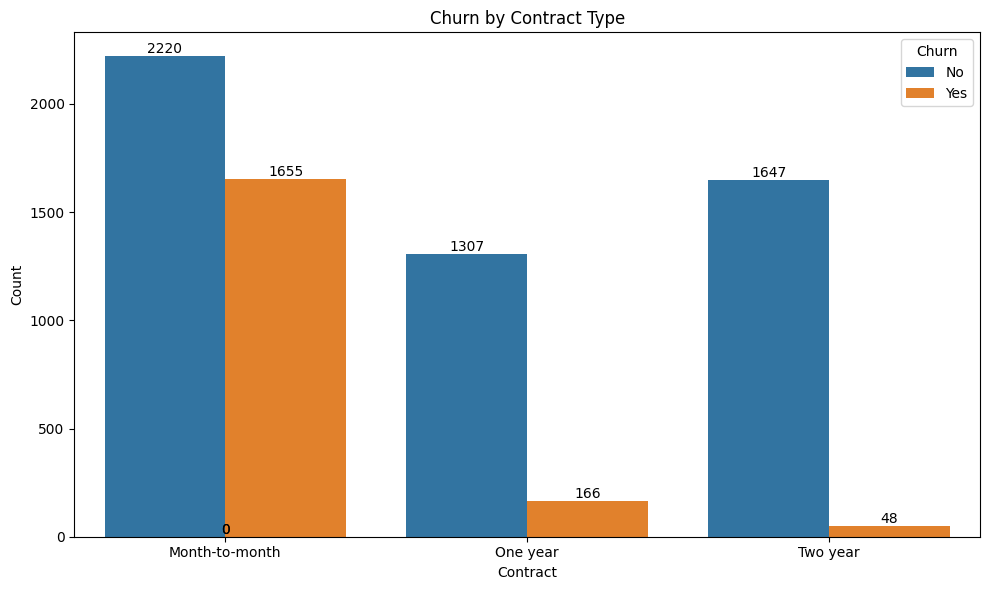

In [24]:
# Count plot of churn by contract type
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Contract', hue='Churn', data=df)

# For labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center',
                va='bottom',
                fontsize=10)
plt.title('Churn by Contract Type')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

In [25]:
df["Contract"].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [26]:
# Churn behaviour observed highest among people on month to month contracts = 1655 count

<Figure size 800x500 with 0 Axes>

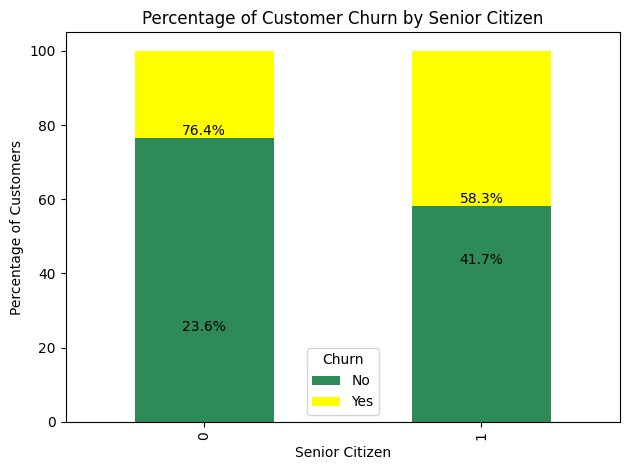

In [27]:
# Plotting % of Senior Citizen who churned
churn_counts = df.groupby([df['SeniorCitizen'], 'Churn']).size().unstack(fill_value=0)

# Calculating percentage
churn_percentage = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8, 5))
colors = ['seagreen', 'yellow']
bars = churn_percentage.plot(kind='bar', stacked=True, color=colors)

# Adding data labels as percentages on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    if height > 0:
        plt.annotate(f'{height:.1f}%',
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center',
                     va='bottom')
plt.title('Percentage of Customer Churn by Senior Citizen')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage of Customers')

plt.tight_layout()
plt.show()

In [28]:
# 58% of senior citizens churned out while 76.4% of non-senior citizen churned out

In [29]:
df['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,5901
1,1142


<Figure size 1000x600 with 0 Axes>

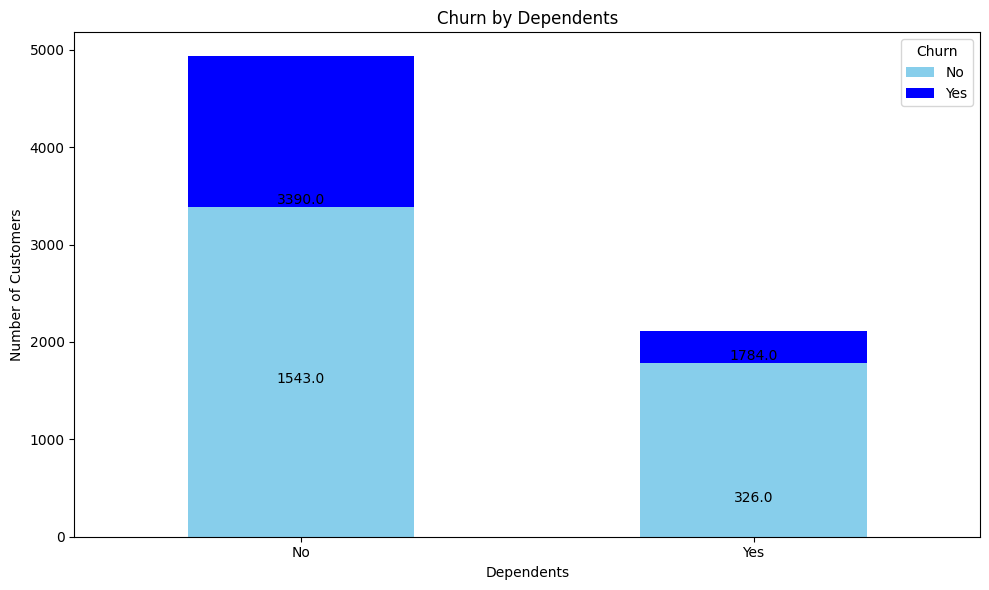

In [30]:
# Plot of Churn by people who have dependants
plt.figure(figsize=(10, 6))
churn_counts = df.groupby(['Dependents', 'Churn']).size().unstack(fill_value=0)
bars = churn_counts.plot(kind='bar', stacked=True, color=['skyblue', 'blue'], figsize=(10, 6))
for bar in bars.containers:
    for b in bar:
        height = b.get_height()
        plt.annotate(f'{height}',
                     xy=(b.get_x() + b.get_width() / 2, height),
                     ha='center', va='bottom')
plt.title('Churn by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [31]:
# 1784 customers with dependants, total churn count = 1869. This means nearly all of the customers who churned had dependants

In [32]:
df.value_counts('Churn')

,count
Churn,
No,5174
Yes,1869


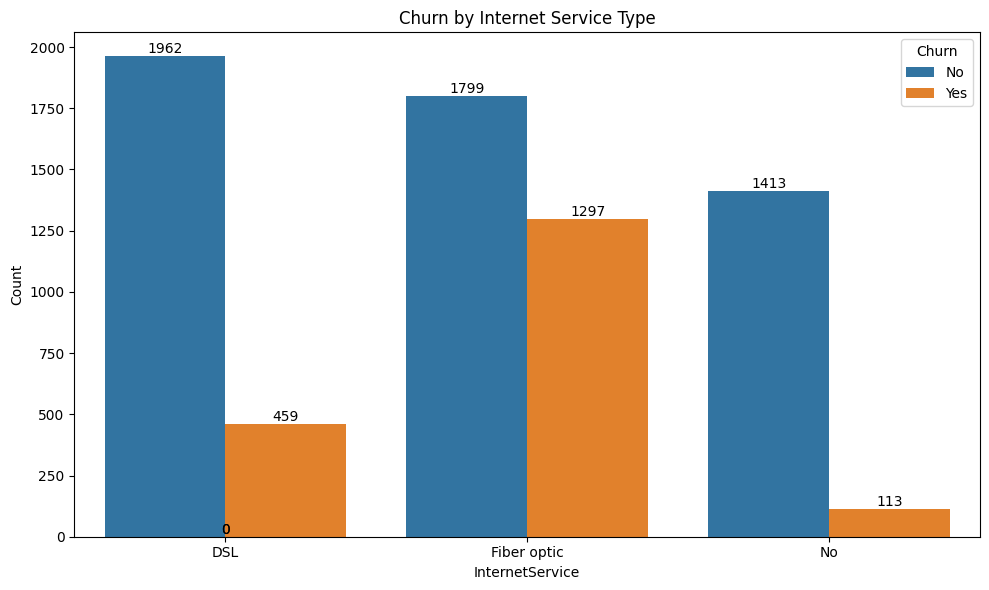

In [33]:
# Plot for Churn by Service type
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='InternetService', hue='Churn', data=df)
# For Data Labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center',
                va='bottom',
                fontsize=10)
plt.title('Churn by Internet Service Type')
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [34]:
# Fiber optic internet service experienced most churn = 1297

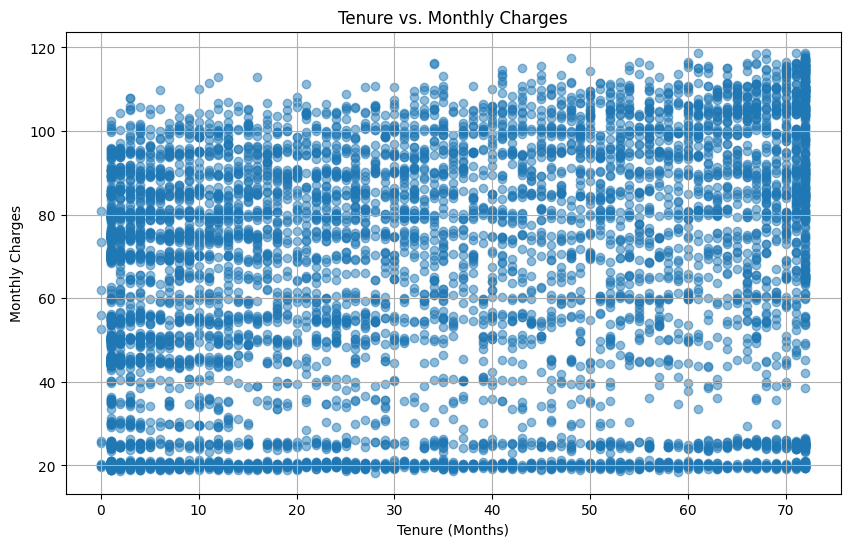

In [35]:
# Scatter plot for Tenure vs Monthly Charges
plt.figure(figsize=(10, 6))
plt.scatter(df['tenure'], df['MonthlyCharges'], alpha=0.5)
plt.title('Tenure vs. Monthly Charges')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges')
plt.grid()
plt.show()

In [36]:
# Monthly charges increase as the tenure passes
# Most charges observed at the initial stage and after 70 months

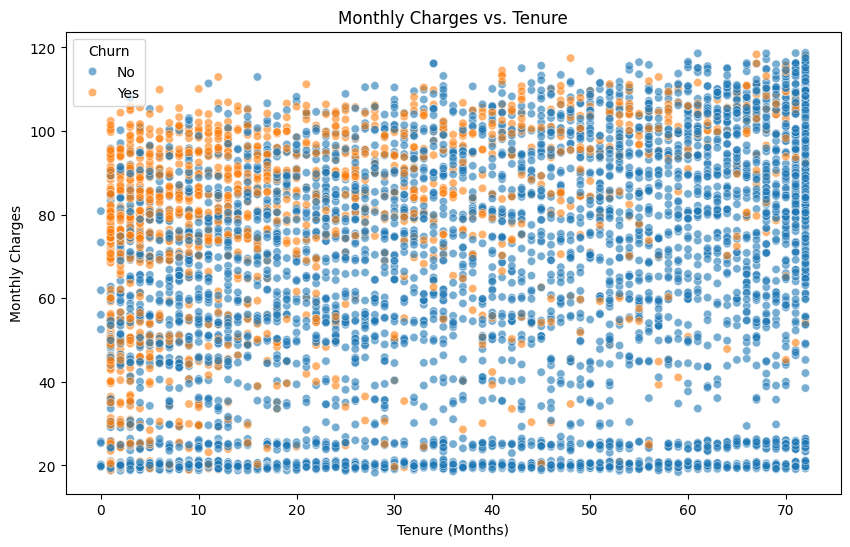

In [37]:
# Scatter plot for Tenure vs Monthly Charges by Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', alpha=0.6)
plt.title('Monthly Charges vs. Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges')
plt.show()

In [38]:
# Most churn observed between 0 - 20 months tenure

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [40]:
# Changing Total Charges data type to Float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.strip(), errors='coerce')

In [41]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


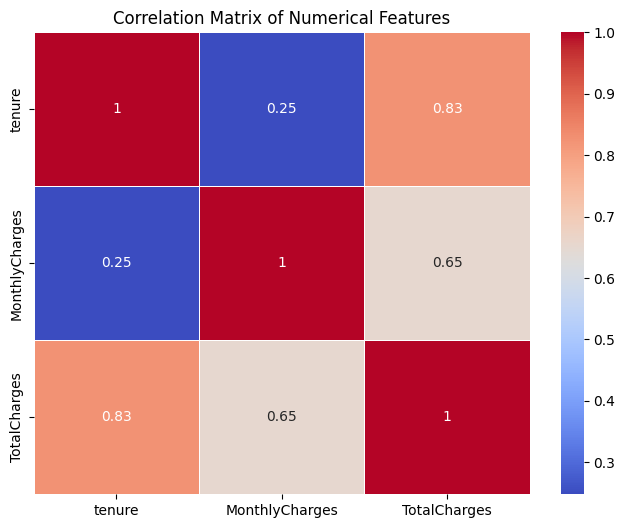

In [42]:
# Selecting only numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Calculating correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [43]:
# 83% correlation of tenure and total charges.

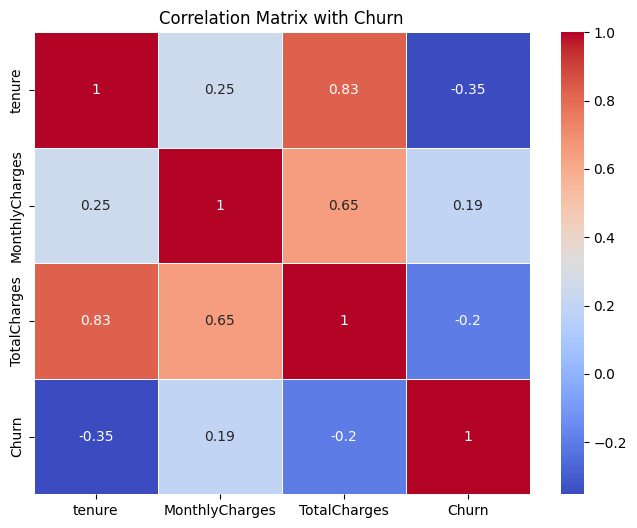

In [44]:
# Encoding 'Churn' column to numeric
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Selecting columns for correlation
columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Calculating correlation matrix
corr_matrix = df[columns].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix with Churn')
plt.show()

# Report

# Findings:

**Churn Rate:** The analysis revealed that 26.54% of customers churned, indicating a significant portion of the customer base is not retained.

**Churn Timing:** A noticeable trend is that most customers churn early in their contracts. This suggests a critical period during which proactive retention strategies could be beneficial.

**Gender Distribution:** The churn behavior shows a higher percentage of female customers, with 55.6% of churners being female compared to 44.4% male.

**Contract Type:** A striking correlation exists between contract type and churn. Customers on month-to-month contracts exhibited the highest churn count, totaling 1655.

**Senior Citizens:** The churn rate among senior citizens is significant, with 58% of senior citizens opting to leave, while a staggering 76.4% of non-senior citizens also churned.

**Dependants:** The analysis highlighted that out of 1869 total churned customers, 1784 had dependants, suggesting that customer churn may be influenced by family needs or responsibilities.

**Internet Service Type:** The data shows that fiber optic internet service has the highest churn rate, with 1297 customers discontinuing their service.

**Monthly Charges and Tenure:** There is a clear trend where monthly charges increase with longer tenure, with most charges occurring at the initial stages and peaking after 70 months.

**Tenure vs. Churn:** The majority of churn was observed within the 0-20 months tenure range, indicating that this is a critical period for customer retention.

**Correlation Analysis:** A strong positive correlation of 83% exists between tenure and total charges, suggesting that longer-tenured customers tend to incur higher total charges.

# Suggestions for Improvement:

**Retention Strategies:**

- Develop a strategy to retain customers during the initial contract phase, especially those on month-to-month contracts. For instance, offer a 30% to 50% discount for the first six months to incentivize them to sign longer contracts (1-2 years).

**Loyalty Programs:**

- Introduce loyalty programs, such as providing gift cards or rewards cards for customers who have been with the company for 3+ years to enhance customer satisfaction and loyalty.

**Support for Senior Citizens:**

- Consider offering financial benefits tailored for senior citizens, potentially including discounted rates or special packages that cater to their financial situation, as many may be reliant on pensions.

**Service Improvements:**

- Enhance the quality of fiber optic internet service and improve customer support in this area, as it currently has the highest churn rate.

**Education on Pricing:**

Implement educational initiatives to inform customers about their out-of-contract pricing. This could help transition customers into contracts, reducing churn.

**Birthday Discounts (Optional):**

Consider offering discounted services as a birthday gift, which could serve as a personal touch that enhances customer satisfaction and retention.